### Loading Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
Energy = pd.read_csv('C:/Users/Dell/Downloads/Regrerssion_energy_production_data.csv' ,sep = ';')

In [3]:
Energy.head(10)

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
5,23.63,60.93,1006.41,83.06,439.90
6,22.99,61.02,1009.88,81.56,440.85
7,12.85,40.00,1015.89,68.85,463.74
8,29.88,68.08,1011.14,55.78,429.33
9,23.22,66.56,1002.47,85.39,437.11


In [4]:
Energy.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


Checking null values.

In [6]:
Energy.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [8]:
#Energy_Dup = Energy[Energy.duplicated()]

In [3]:
Energy_New = pd.DataFrame(Energy)
Energy_New.drop_duplicates(inplace=True)

In [4]:
Energy_New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9527 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9527 non-null   float64
 1   exhaust_vacuum     9527 non-null   float64
 2   amb_pressure       9527 non-null   float64
 3   r_humidity         9527 non-null   float64
 4   energy_production  9527 non-null   float64
dtypes: float64(5)
memory usage: 446.6 KB


In [9]:
Energy_New.shape

(9527, 5)

Checking the relation between columns with Energy production.

In [5]:
Energy_New.corr()["energy_production"]

temperature         -0.947908
exhaust_vacuum      -0.869900
amb_pressure         0.518687
r_humidity           0.391175
energy_production    1.000000
Name: energy_production, dtype: float64

### Visualization

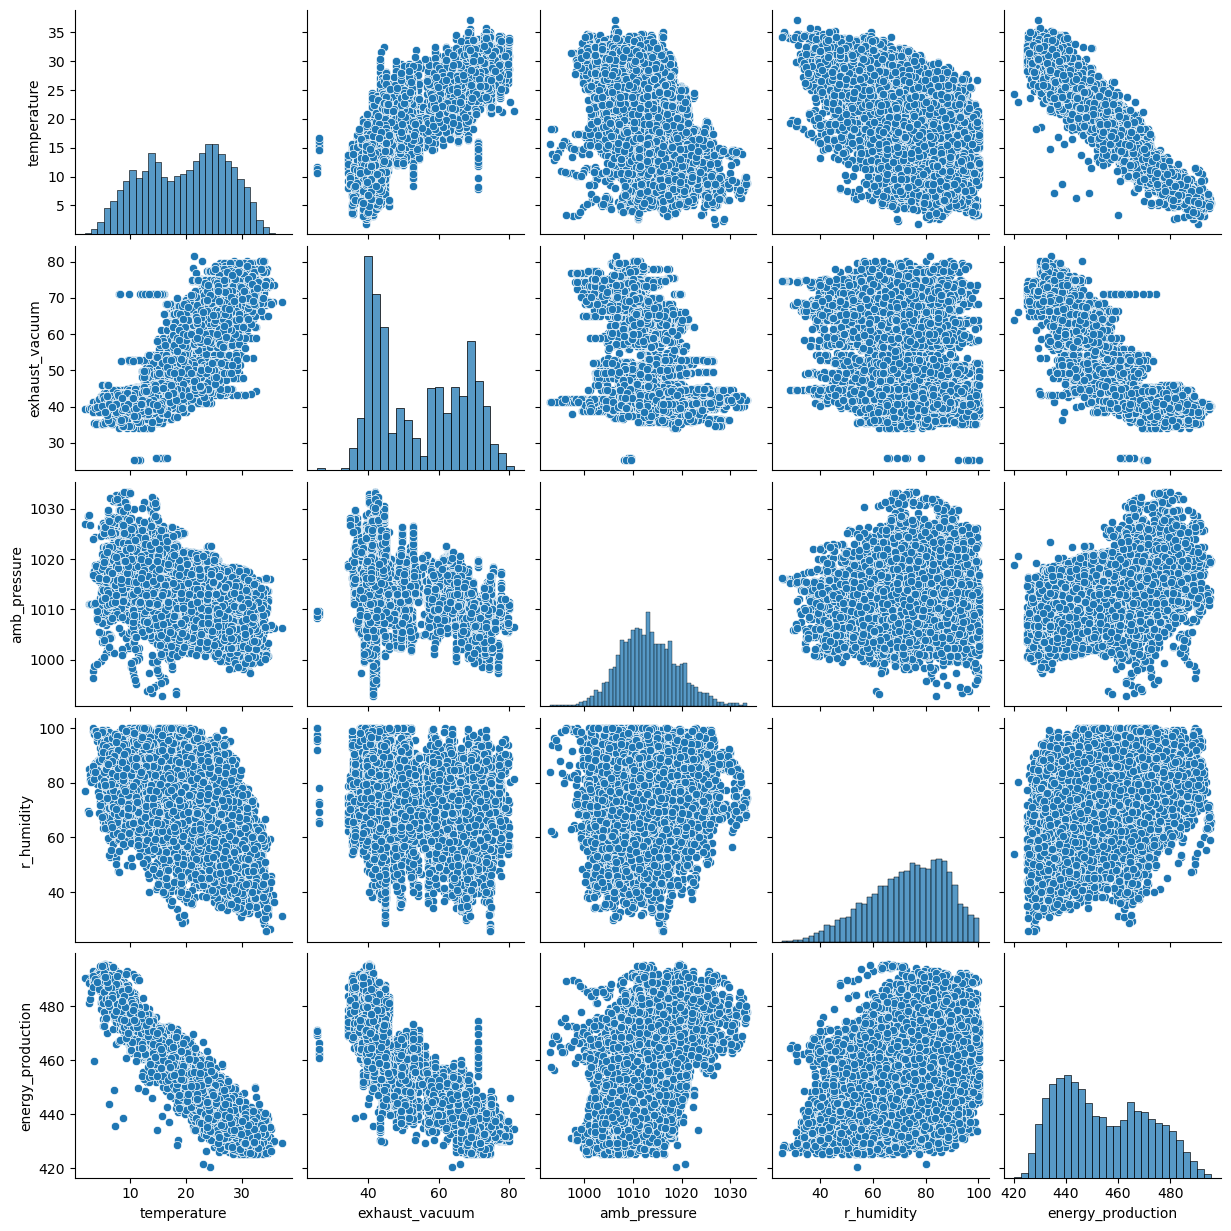

In [13]:
sns.pairplot(Energy_New)

In [4]:
Energy_corr = Energy_New.corr()

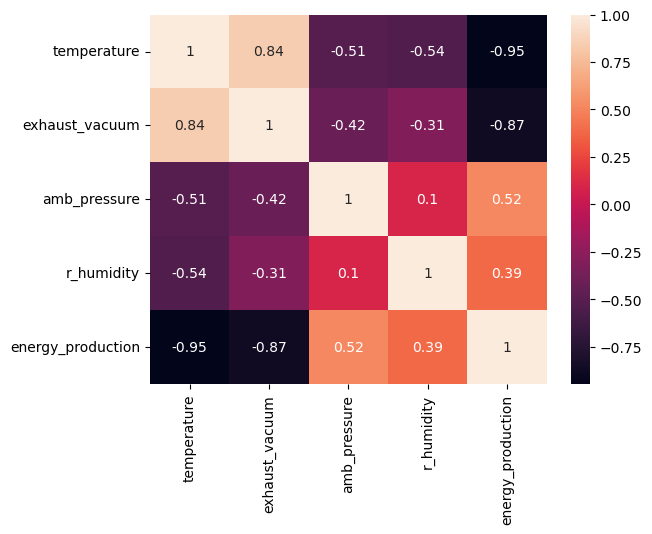

In [7]:
sns.heatmap(Energy_corr , annot=True)
plt.show()

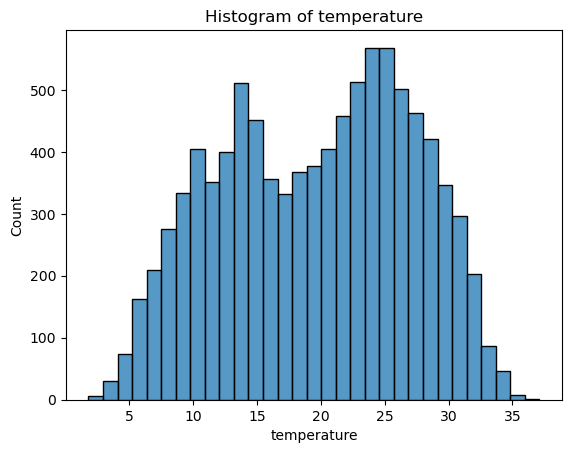

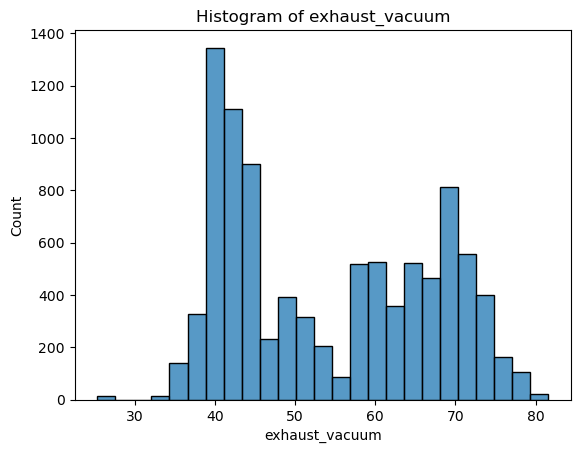

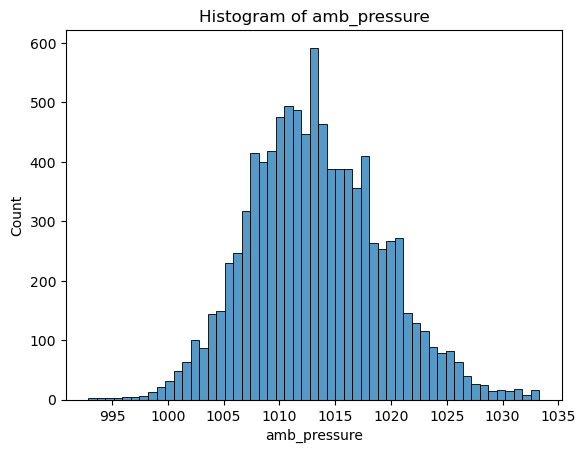

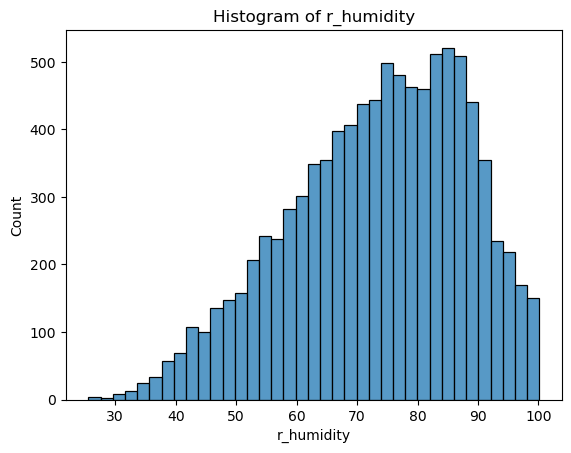

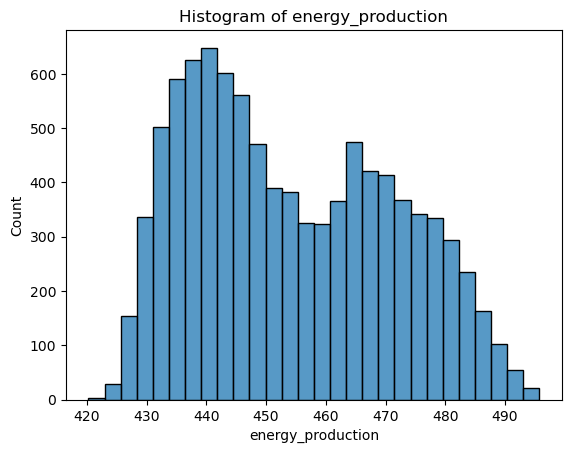

In [16]:
variables = ["temperature", "exhaust_vacuum", "amb_pressure", "r_humidity", "energy_production"]

# Creating histograms
for var in variables:
  sns.histplot(data = Energy_New, x = var)
  plt.title("Histogram of {}".format(var))
  plt.show()

In [55]:
Energy_New['r_humidity'].skew()

-0.43513848893895307

In [56]:
Energy_New['amb_pressure'].skew()

0.273845628693525

In histogram plot we can clearly see the r_humidity and the amb_pressure plots are skewed.

Creating the boxplots for all the variables present in the data set to check if there are outliers.

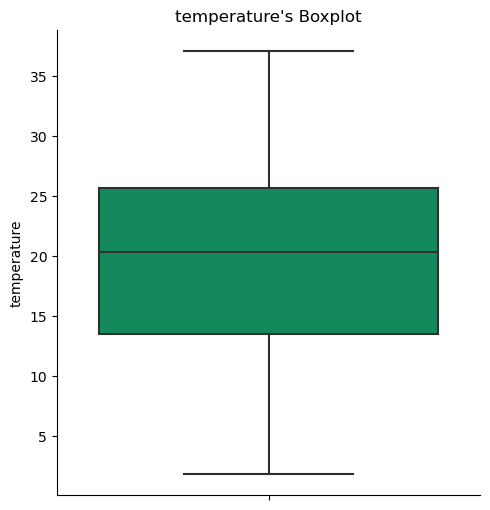

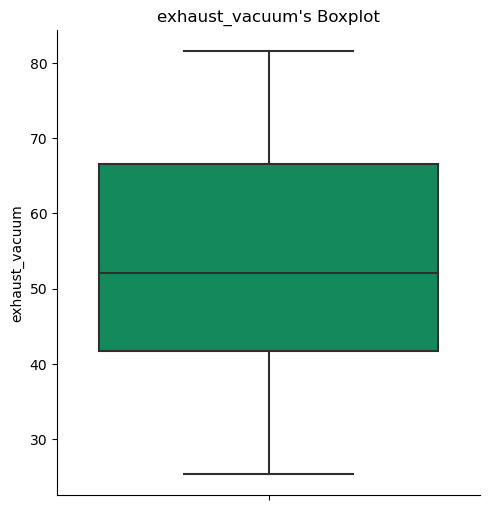

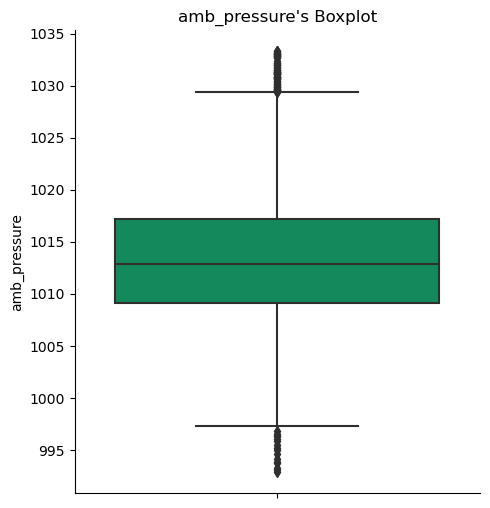

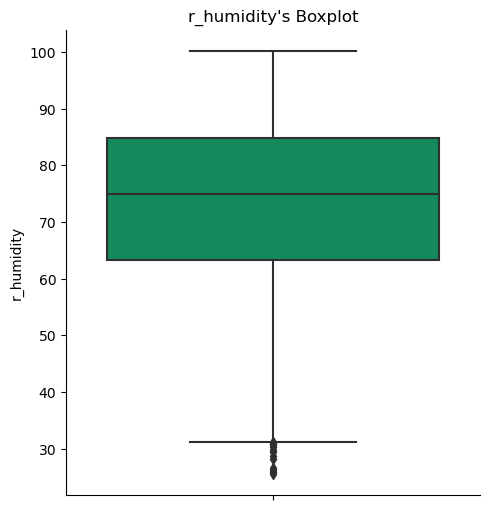

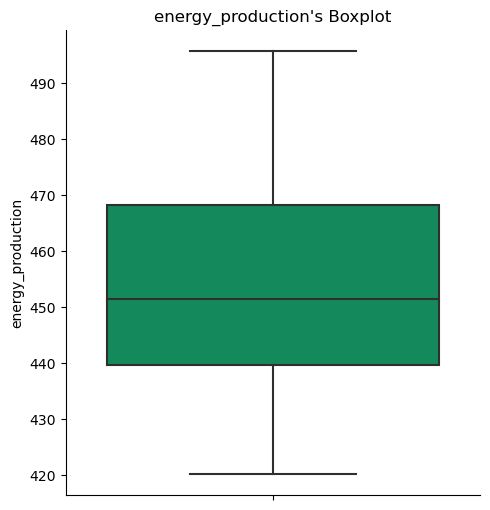

In [19]:
# Creting Boxplots
for var in variables:
  sns.catplot(data= Energy_New, y = var, kind = "box", color = "#009E60")
  plt.title("{}'s Boxplot".format(var))
  plt.show()

We see here there are outliers present in the amb_pressure and r_humidity column which will affect our results in model building. So, we will try to remove them from out data and clean it.

Removing the outliers from the r_humidity column.

In [4]:
percentile25 = Energy_New['r_humidity'].quantile(0.25)
percentile75 = Energy_New['r_humidity'].quantile(0.75)

In [5]:
IQR = percentile75 - percentile25
IQR

21.474999999999994

In [6]:
upperlimit = percentile75 + 1.5*IQR
lowerlimit = percentile25 - 1.5*IQR

In [11]:
print('Upperlimit', upperlimit) 
print('Lowerlimit', lowerlimit)

Upperlimit 117.06249999999999
Lowerlimit 31.16250000000001


In [7]:
Energy_C1 = Energy_New[Energy_New['r_humidity'] > lowerlimit]

Checking if the outliers are removed from the column.

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


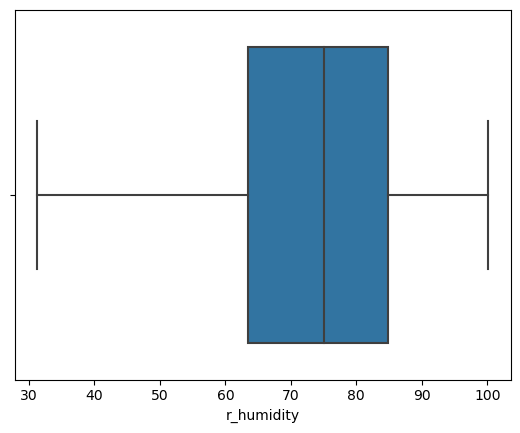

In [10]:
sns.boxplot(Energy_C1['r_humidity'])
plt.show()

Now there are no outliers present in the r_humidity column.

Removing the outliers from the amb_pressure column.

In [8]:
percentile25 = Energy_C1['amb_pressure'].quantile(0.25)
percentile75 = Energy_C1['amb_pressure'].quantile(0.75)

In [9]:
IQR = percentile75 - percentile25
IQR

8.11749999999995

In [10]:
upperlimit = percentile75 + 1.5*IQR
lowerlimit = percentile25 - 1.5*IQR

In [16]:
print('Upperlimit', upperlimit) 
print('Lowerlimit', lowerlimit)

Upperlimit 1029.38375
Lowerlimit 996.9137500000002


In [11]:
Energy_C2 = Energy_C1[Energy_C1['amb_pressure'] > lowerlimit]

In [12]:
Energy_C2 = Energy_C2[Energy_C2['amb_pressure'] < upperlimit]

Checking if the outliers are removed from the column.

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


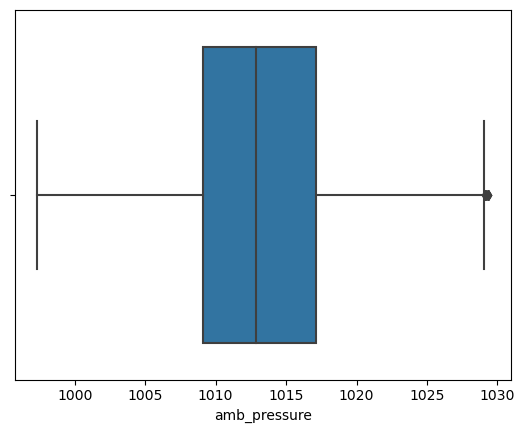

In [69]:
sns.boxplot(Energy_C2['amb_pressure'])
plt.show()

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

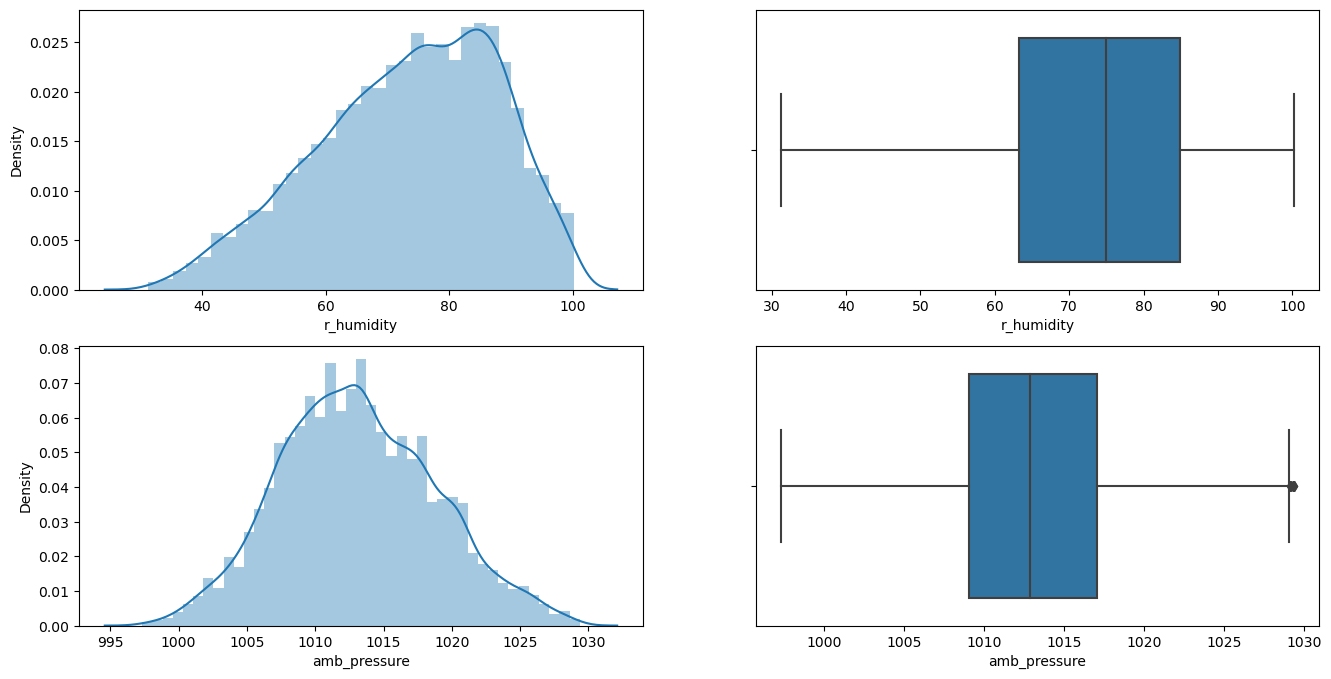

In [85]:
#Compairing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(Energy_C2['r_humidity'])

plt.subplot(2,2,2)
sns.boxplot(Energy_C2['r_humidity'])

plt.subplot(2,2,3)
sns.distplot(Energy_C2['amb_pressure'])

plt.subplot(2,2,4)
sns.boxplot(Energy_C2['amb_pressure'])

plt.show()

After removing many outliers from the amb_pressure column still few are left which won't affect out final results.

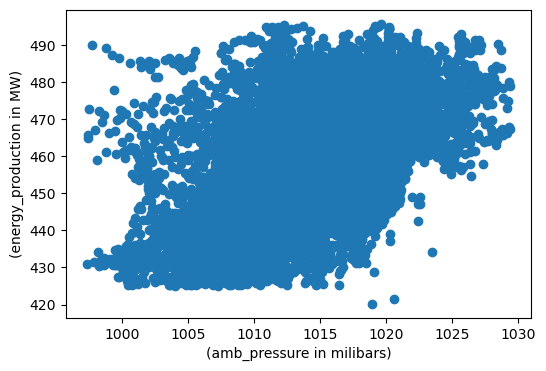

In [70]:
# Scatter plot for amb vs energy
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(Energy_C2['amb_pressure'],Energy_C2['energy_production'])

# x-axis label
ax.set_xlabel('(amb_pressure in milibars)')

# y-axis label
ax.set_ylabel('(energy_production in MW)')
plt.show()


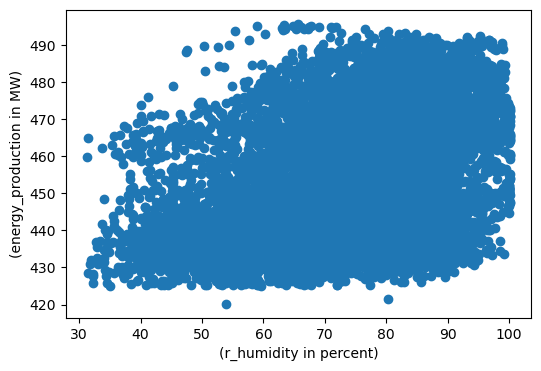

In [71]:
# Scatter plot for humidity vs energy
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(Energy_C2['r_humidity'],Energy_C2['energy_production'])

# x-axis label
ax.set_xlabel('(r_humidity in percent)')

# y-axis label
ax.set_ylabel('(energy_production in MW)')
plt.show()

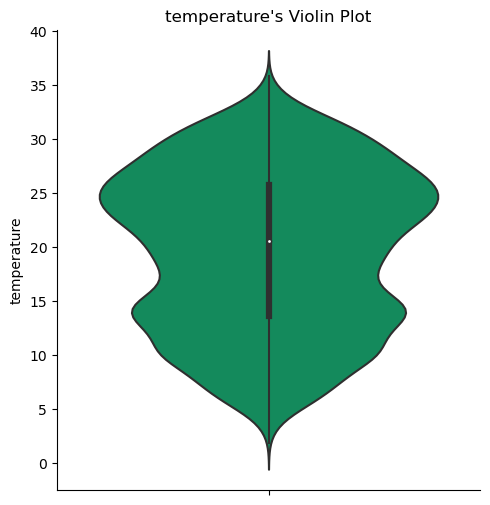

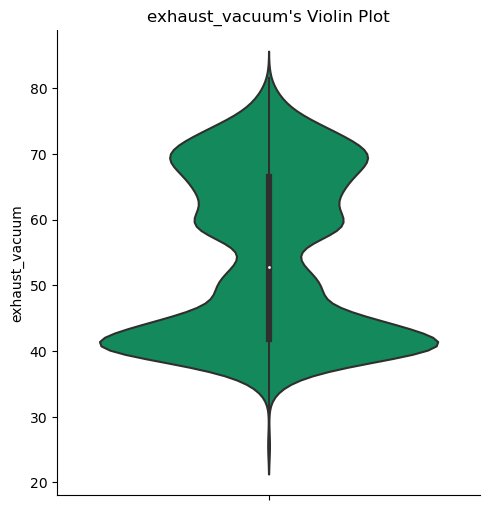

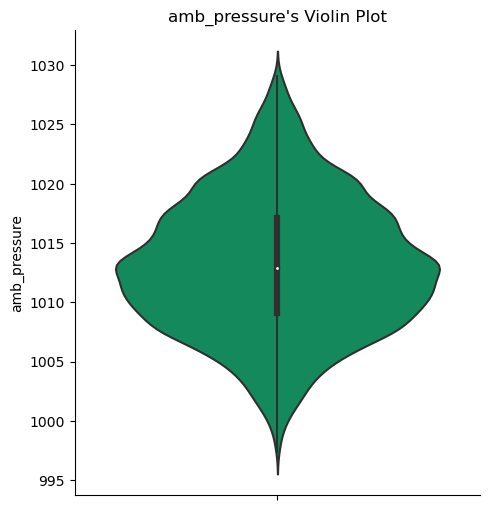

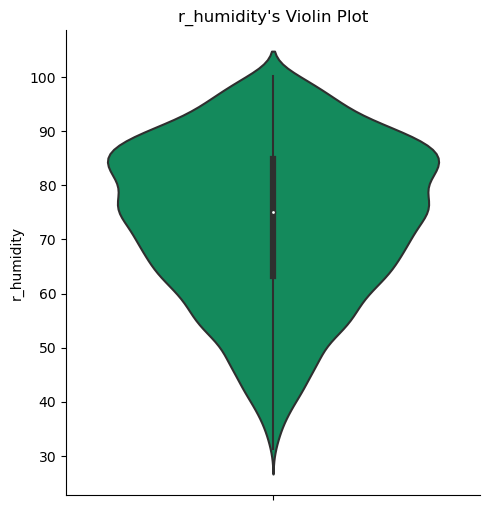

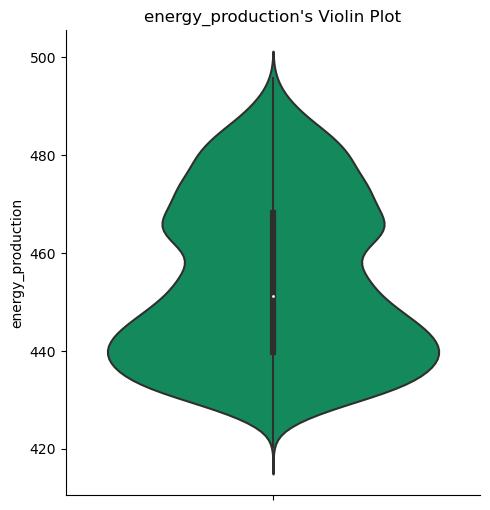

In [72]:
# Creting Violin Plot
for var in variables:
  sns.catplot(data= Energy_C2, y = var, kind = "violin", color = "#009E60")
  plt.title("{}'s Violin Plot".format(var))
  plt.show()

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


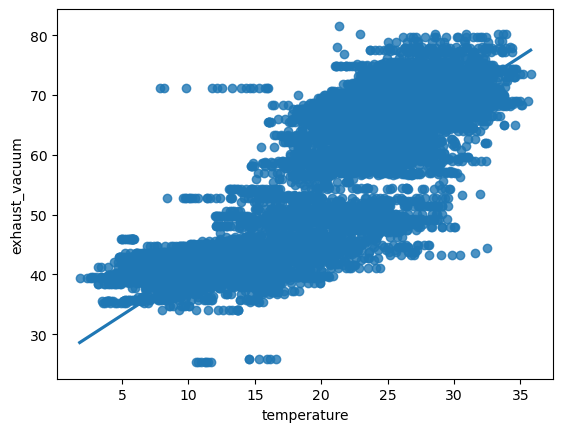

In [73]:
sns.regplot('temperature', 'exhaust_vacuum', data=Energy_C2) 
plt.show()

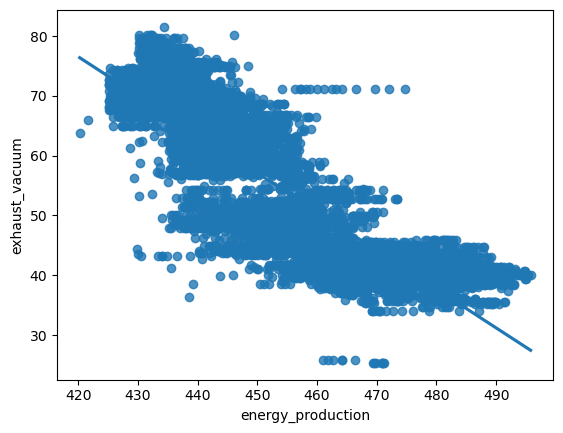

In [74]:
sns.regplot('energy_production', 'exhaust_vacuum', data=Energy_C2)
plt.show()

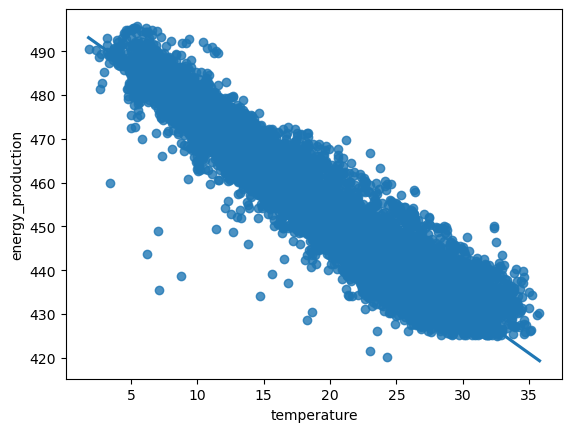

In [75]:
sns.regplot('temperature', 'energy_production', data=Energy_C2) 
plt.show()

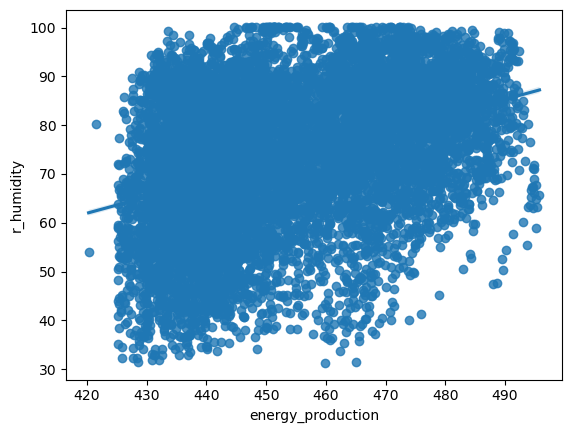

In [76]:
sns.regplot('energy_production', 'r_humidity', data=Energy_C2) 
plt.show()

This shows that r_humidity does not go well with the energy production. As you can see the data points are quite far from the line. But it still is not completely unrelated so as to exclude it from the model.

# Normalising the data.

In [14]:
from sklearn import preprocessing

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
d = preprocessing.normalize(Energy_C2)
scaled_df = pd.DataFrame(d, columns=Energy_C2.columns)
print(scaled_df)

      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0        0.008506        0.034201      0.902042    0.053306           0.426891
1        0.010695        0.037611      0.905823    0.084096           0.413382
2        0.012283        0.039923      0.907240    0.072346           0.412235
3        0.012205        0.048305      0.905506    0.070349           0.415484
4        0.013427        0.044025      0.907975    0.066516           0.411142
...           ...             ...           ...         ...                ...
9418     0.015421        0.044810      0.906771    0.073784           0.412404
9419     0.022222        0.058713      0.912432    0.047445           0.401592
9420     0.027765        0.051297      0.916848    0.051297           0.391607
9421     0.020732        0.059538      0.919990    0.072374           0.380008
9422     0.015842        0.043955      0.911105    0.056825           0.405555

[9423 rows x 5 columns]


In [28]:
New = d.reshape(-1, 1)

### Model Building

In [49]:
import statsmodels.formula.api as smf
model = smf.ols("energy_production~temperature + exhaust_vacuum + amb_pressure + r_humidity",data = scaled_df).fit()

In [50]:
model.params

Intercept         2.371461
temperature      -0.060782
exhaust_vacuum   -0.141939
amb_pressure     -2.140878
r_humidity       -0.148263
dtype: float64

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.403e+06
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:59:33   Log-Likelihood:                 61022.
No. Observations:                9423   AIC:                        -1.220e+05
Df Residuals:                    9418   BIC:                        -1.220e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.3715      0.002   1164.171      0.000       2.367       2.375
temperature       -0.0608      0.002    -32.042      0.000      -0.065      -0.057
exhaust_vacuum    -0.1419      0.001   -211.584      0.000      -0.143      -0.141
amb_pressure      -2.1409      0.002   -942.447      0.000      -2.145      -2.136
r_humidity        -0.1483      0.000   -401.761      0.000      -0.149      -0.148
==============================================================================
Omnibus:                      775.494   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1095.241
Skew:                          -0.676   Prob(JB):                    1.48e-238
Kurtosis:                       3.981   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 1/ Multi Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.stats.tests.test_influence
import statsmodels.api as sm

In [41]:
#X = scaled_df.iloc[:, :-1].values
#y=  scaled_df.iloc[:, -1].values

In [64]:
X = Energy_C2.iloc[:, :-1].values
y=  Energy_C2.iloc[:, -1].values

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)

In [66]:
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

### Training the Multi Linear Regression model on the Training set.

In [67]:
regressor = LinearRegression()
regressor.fit(X_train_norm, y_train)

LinearRegression()

### ~Prediction the test results for model 1.

In [68]:
y_pred = regressor.predict(X_test_norm)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[457.81 458.67]
 [443.07 444.21]
 [467.67 472.47]
 ...
 [433.71 439.81]
 [445.07 443.58]
 [448.72 454.26]]


In [63]:
from sklearn.metrics import r2_score

### Evaluating the Model 1 Performance.

In [58]:
r2_score(y_test, y_pred)

0.9268386335609006

In [59]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(regressor, X,y, scoring = 'neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-20.892307220458424


## 2/ Decision Tree Regression

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)

### Training the Decision Tree Regression model on the Training set.

In [70]:
from sklearn.tree import DecisionTreeRegressor
regressor_d = DecisionTreeRegressor(random_state = 0)
regressor_d.fit(X_train_norm, y_train)

DecisionTreeRegressor(random_state=0)

### ~Prediction the test results for model 2.

In [72]:
y_pred = regressor_d.predict(X_test_norm)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[456.16 458.67]
 [443.94 444.21]
 [472.37 472.47]
 ...
 [433.02 439.81]
 [442.28 443.58]
 [450.14 454.26]]


### Evaluating the Model 2 Performance.

In [73]:
r2_score(y_test, y_pred)

0.9311314095192296

In [74]:
mse = cross_val_score(regressor_d, X,y, scoring = 'neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-21.510841490862603


## 3/ Polynomial Regression

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)

### Training the Polynomial Regression model on the Training set.

In [75]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train_norm)
regressor_p = LinearRegression()
regressor_p.fit(X_poly, y_train)

LinearRegression()

### ~Prediction the test results for model 3.

In [76]:
y_pred = regressor_p.predict(poly_reg.transform(X_test_norm))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[457.34 458.67]
 [442.48 444.21]
 [469.84 472.47]
 ...
 [434.93 439.81]
 [443.76 443.58]
 [448.03 454.26]]


### Evaluating the Model 3 Performance.

In [77]:
r2_score(y_test, y_pred)

0.9409057066268466

In [78]:
mse = cross_val_score(regressor_p, X,y, scoring = 'neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-20.892307220458424


## 4/ KNN

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)

### Training the KNN model on the Training set.

In [79]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=5, p=2)
KNN.fit(X_train_norm,y_train)

KNeighborsRegressor()

### ~Prediction the test results for model 5.

In [80]:
y_pred = KNN.predict(X_test_norm)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[460.78 458.67]
 [444.16 444.21]
 [473.76 472.47]
 ...
 [434.06 439.81]
 [443.7  443.58]
 [452.4  454.26]]


### Evaluating the Model 5 Performance.

In [81]:
r2_score(y_test, y_pred)

0.9478611688224018

In [82]:
mse = cross_val_score(KNN, X,y, scoring = 'neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-15.920319235269394


## 5/ Random Forest Regression

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)

### Training the Randon Forest Regression model on the Training set.

In [114]:
from sklearn.ensemble import RandomForestRegressor
regressor_r = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_r.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

### ~Prediction the test results for model 5.

In [115]:
y_pred = regressor_r.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[457.97 458.67]
 [445.14 444.21]
 [471.23 472.47]
 ...
 [435.11 439.81]
 [442.65 443.58]
 [448.3  454.26]]


### Evaluating the Model 5 Performance.

In [116]:
r2_score(y_test, y_pred)

0.9546233874445235

In [117]:
mse = cross_val_score(regressor_r, X,y, scoring = 'neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-12.488843515672448


Comparing the r2 value of all the 5 models we can go with he Polinomial Regression model as it has the highest r2 value among all models.

In [118]:
import pickle
pickle_out = open('regressor_r.pkl' , 'wb')
pickle.dump(regressor_r , pickle_out)
pickle_out.close()

In [119]:
regressor_r.predict([[9.59,38.56,1017.01,60.10]])

array([481.07])

streamlit code

In [ ]:
"""
import streamlit as st
import numpy as np 
import pandas as pd
import pickle

pickle_in = open('D:/raj/Data Science Assignments/Turbines_Energy_Production/regressor_r.pkl' , 'rb')
regressor_r = pickle.load(pickle_in)

def predict_energy_production(temperature,exhaust_vacuum,amb_pressure,r_humidity):


    prediction = regressor_r.predict([[temperature,exhaust_vacuum,amb_pressure,r_humidity]])
    print(prediction)
    return prediction
    
def main():
    st.title('Energy Predictor')
    html_temp = """
    #<div style = 'background-color:tomato;padding:10px'>
    #<h2  style = 'color:white;text-align:center;'>Energy Predictor App </h2>
    #</div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    temperature = st.text_input("temperature","Type Here")
    exhaust_vacuum	= st.text_input("exhaust_vacuum","Type Here")
    amb_pressure = st.text_input("amb_pressure","Type Here")
    r_humidity = st.text_input("r_humidity","Type Here")
    result = ""
    if st.button("Predict"):
        result = predict_energy_production(temperature,exhaust_vacuum,amb_pressure,r_humidity)
    st.success('The output is{}'. format(result))
    
    
if __name__ == '__main__':
    main()
"""